<a href="https://colab.research.google.com/github/sunnysavita10/Generative-AI-Indepth-Basic-to-Advance/blob/main/Langchain_memory_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

langchain.memory = https://api.python.langchain.com/en/latest/langchain_api_reference.html#module-langchain.memory

In [1]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 710.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.5/288.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.7 MB/s eta 0:00:00


In [3]:
!pip install langchain_google_genai

In [10]:
import warnings
warnings.filterwarnings('ignore')

gootle_api_key = https://aistudio.google.com/app/apikey

langsmith_api_key = https://smith.langchain.com/o/2b36e0a1-975c-5806-b1e4-d6ee61291578/?paginationState=%7B%22pageIndex%22%3A0%2C%22pageSize%22%3A5%7D

tavily_api_key = https://app.tavily.com/home?code=agSQxU1mafqqUJbBeeDMnjIM1b4DsEtCPrzDP5gNFhSEx&state=eyJyZXR1cm5UbyI6Ii9ob21lIn0

In [11]:
import os
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

model = https://ai.google.dev/gemini-api/docs/models/gemini

In [12]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-1.0-pro",convert_system_message_to_human=True)

In [13]:
print(model.invoke("hi").content)

Hello there! How can I assist you today?


In [14]:
print(model.invoke("hi, how are you please tell me?").content)

I am well, thank you for asking. I am a large language model, trained by Google. I do not have personal experiences or feelings, but I am designed to be informative and helpful. How can I assist you today?


# ConversationBufferMemory
doc = https://python.langchain.com/v0.1/docs/modules/memory/types/buffer/

parameters_class = https://python.langchain.com/api_reference/langchain/memory/langchain.memory.buffer.ConversationBufferMemory.html#langchain.memory.buffer.ConversationBufferMemory.buffer

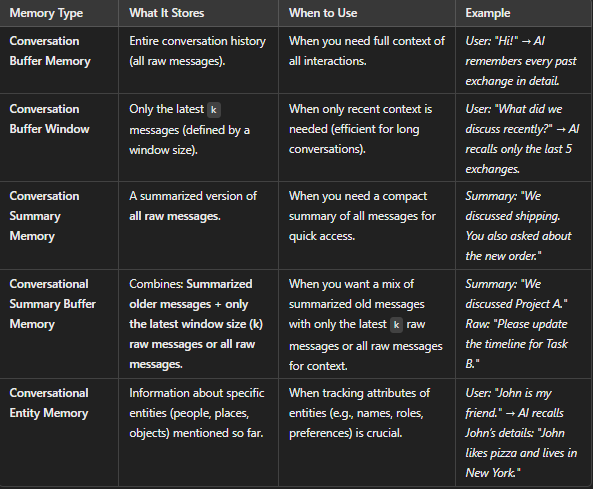 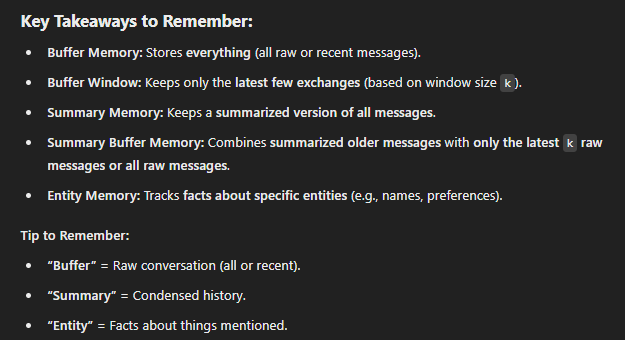

In [15]:
from langchain.memory import ConversationBufferMemory

In [16]:
memory = ConversationBufferMemory()

In [17]:
## first way to store and getting conversation
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})

In [18]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [19]:
memory2 = ConversationBufferMemory(return_messages=True) # return_messages = True = provide in list form

In [20]:
memory2.save_context({"input": "Hi"},
                    {"output": "What's up"})

In [21]:
memory2.load_memory_variables({})

{'history': [HumanMessage(content='Hi'), AIMessage(content="What's up")]}

In [22]:
import os

In [23]:
from langchain.chains import ConversationChain

In [24]:
## second way to store and getting conversation
conversation = ConversationChain(llm=model,verbose=True,memory=ConversationBufferMemory())

In [25]:
conversation.predict(input="Hi there!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there!
AI:

> Finished chain.


"Hello! It's nice to meet you."

In [26]:
conversation.predict(input="Nothing much! Just tell me how do a conversation with an AI.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hello! It's nice to meet you.
Human: Nothing much! Just tell me how do a conversation with an AI.
AI:

> Finished chain.


"1. **Be clear and concise.** AI can't understand vague or ambiguous language.\n2. **Use specific examples.** This will help the AI to understand what you're talking about.\n3. **Be patient.** AI is still under development and it may take some time for it to understand you.\n4. **Have fun!** Conversations with AI can be a lot of fun. Just relax and be yourself.\n\nHere are some tips for having a conversation with an AI:\n\n* **Start with a greeting.** This will help to establish a rapport with the AI.\n* **Ask open-ended questions.** This will give the AI more opportunities to respond.\n* **Follow up on the AI's responses.** This will show that you're interested in what it has to say.\n* **Be patient.** AI is still under development and it may take some time for it to understand you.\n* **Have fun!** Conversations with AI can be a lot of fun. Just relax and be yourself."

In [27]:
conversation.predict(input="how many tips are there can you mention in the numbers")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hello! It's nice to meet you.
Human: Nothing much! Just tell me how do a conversation with an AI.
AI: 1. **Be clear and concise.** AI can't understand vague or ambiguous language.
2. **Use specific examples.** This will help the AI to understand what you're talking about.
3. **Be patient.** AI is still under development and it may take some time for it to understand you.
4. **Have fun!** Conversations with AI can be a lot of fun. Just relax and be yourself.

Here are some tips for having a conversation with an AI:

* **Start with a greeting.** This will help to establish a rapport with the AI.
* **Ask open-ended questions.** This will give the AI m

'There are 5 tips mentioned in the numbers:\n\n1. Be clear and concise.\n2. Use specific examples.\n3. Be patient.\n4. Have fun!\n\n'

In [28]:
conversation.memory.chat_memory.messages

[HumanMessage(content='Hi there!'),
 AIMessage(content="Hello! It's nice to meet you."),
 HumanMessage(content='Nothing much! Just tell me how do a conversation with an AI.'),
 AIMessage(content="1. **Be clear and concise.** AI can't understand vague or ambiguous language.\n2. **Use specific examples.** This will help the AI to understand what you're talking about.\n3. **Be patient.** AI is still under development and it may take some time for it to understand you.\n4. **Have fun!** Conversations with AI can be a lot of fun. Just relax and be yourself.\n\nHere are some tips for having a conversation with an AI:\n\n* **Start with a greeting.** This will help to establish a rapport with the AI.\n* **Ask open-ended questions.** This will give the AI more opportunities to respond.\n* **Follow up on the AI's responses.** This will show that you're interested in what it has to say.\n* **Be patient.** AI is still under development and it may take some time for it to understand you.\n* **Have 

In [29]:
conversation.predict(input="can you give me the 3rd tip?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hello! It's nice to meet you.
Human: Nothing much! Just tell me how do a conversation with an AI.
AI: 1. **Be clear and concise.** AI can't understand vague or ambiguous language.
2. **Use specific examples.** This will help the AI to understand what you're talking about.
3. **Be patient.** AI is still under development and it may take some time for it to understand you.
4. **Have fun!** Conversations with AI can be a lot of fun. Just relax and be yourself.

Here are some tips for having a conversation with an AI:

* **Start with a greeting.** This will help to establish a rapport with the AI.
* **Ask open-ended questions.** This will give the AI m

'The 3rd tip is: **Be patient.**'

# ConversationBufferWindowMemory
doc = https://python.langchain.com/v0.1/docs/modules/memory/types/buffer_window/

parameters_class = https://python.langchain.com/api_reference/langchain/memory/langchain.memory.buffer_window.ConversationBufferWindowMemory.html#conversationbufferwindowmemory

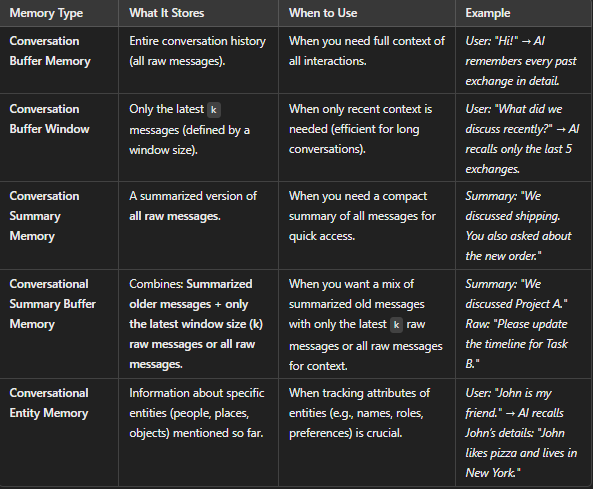 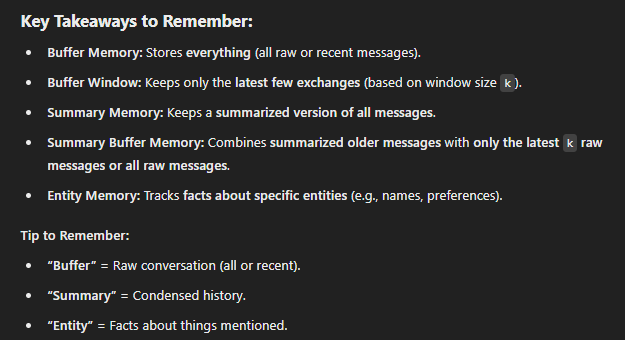

In [30]:
from langchain.memory import ConversationBufferWindowMemory

In [31]:
window_memory = ConversationBufferWindowMemory(k=1)

In [32]:
## first way to store and getting conversation
window_memory.save_context(
    {"input": "Hi"},
    {"output": "What's up"}
)

In [33]:
window_memory.save_context(
    {"input": "Not much, just hanging"},
    {"output": "Cool"}
)

In [34]:
window_memory.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [35]:
window_memory = ConversationBufferWindowMemory( k=2, return_messages=True)

In [36]:
window_memory.save_context(
    {"input": "Hi"},
    {"output": "What's up"}
)
window_memory.save_context(
    {"input": "Not much, just hanging"},
    {"output": "Cool"}
)
window_memory.save_context(
    {"input": "ok thanks "},
    {"output": "great thankyou"}
)


In [37]:
window_memory.load_memory_variables({})

{'history': [HumanMessage(content='Not much, just hanging'),
  AIMessage(content='Cool'),
  HumanMessage(content='ok thanks '),
  AIMessage(content='great thankyou')]}

In [41]:
## second way to store and getting conversation
conversation_window = ConversationChain(
    llm=model,
    memory=window_memory,
    verbose=True
)

In [42]:
conversation_window.predict(input="Hi, what's up?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content="Hi, what's up?"), AIMessage(content='Not much, just hanging.'), HumanMessage(content='how we can talk with AI'), AIMessage(content='There are many ways to communicate with AI. One way is through natural language processing (NLP), which allows AI to understand and respond to human language. Another way is through machine learning, which allows AI to learn from data and improve its performance over time.')]
Human: Hi, what's up?
AI:

> Finished chain.


'Not much, just hanging.'

In [43]:
conversation_window.predict(input="how we can talk with AI give me 5 points")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='how we can talk with AI'), AIMessage(content='There are many ways to communicate with AI. One way is through natural language processing (NLP), which allows AI to understand and respond to human language. Another way is through machine learning, which allows AI to learn from data and improve its performance over time.'), HumanMessage(content="Hi, what's up?"), AIMessage(content='Not much, just hanging.')]
Human: how we can talk with AI give me 5 points
AI:

> Finished chain.


'1. **Natural language processing (NLP)**: This allows AI to understand and respond to human language.\n2. **Machine learning**: This allows AI to learn from data and improve its performance over time.\n3. **Speech recognition**: This allows AI to convert spoken words into text.\n4. **Computer vision**: This allows AI to "see" and interpret images.\n5. **Robotics**: This allows AI to control physical devices, such as robots.'

In [47]:
conversation_window.predict(input="what is a allows AI to 'see' and 'interpret' images?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='can you tell me how many tips you genearte in the previous to previous message?'), AIMessage(content='5'), HumanMessage(content='what was the fifth number tips?'), AIMessage(content='I do not have that information in context.')]
Human: what is a allows AI to 'see' and 'interpret' images?
AI:

> Finished chain.


'Convolutional Neural Network'

In [48]:
conversation_window.predict(input="can you tell me how many tips you genearte in the previous to previous message?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='what was the fifth number tips?'), AIMessage(content='I do not have that information in context.'), HumanMessage(content="what is a allows AI to 'see' and 'interpret' images?"), AIMessage(content='Convolutional Neural Network')]
Human: can you tell me how many tips you genearte in the previous to previous message?
AI:

> Finished chain.


'I do not have that information in context.'

In [46]:
conversation.predict(input="what was the fifth number tips?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content="what is a allows AI to 'see' and 'interpret' images?"), AIMessage(content='Computer vision'), HumanMessage(content='can you tell me how many tips you genearte in the previous to previous message?'), AIMessage(content='5')]
Human: what was the fifth number tips?
AI:

> Finished chain.


'I do not have that information in context.'

# ConversationEntityMemory
doc = https://python.langchain.com/v0.1/docs/modules/memory/types/entity_summary_memory/

parameters_class = https://api.python.langchain.com/en/latest/memory/langchain.memory.entity.ConversationEntityMemory.html

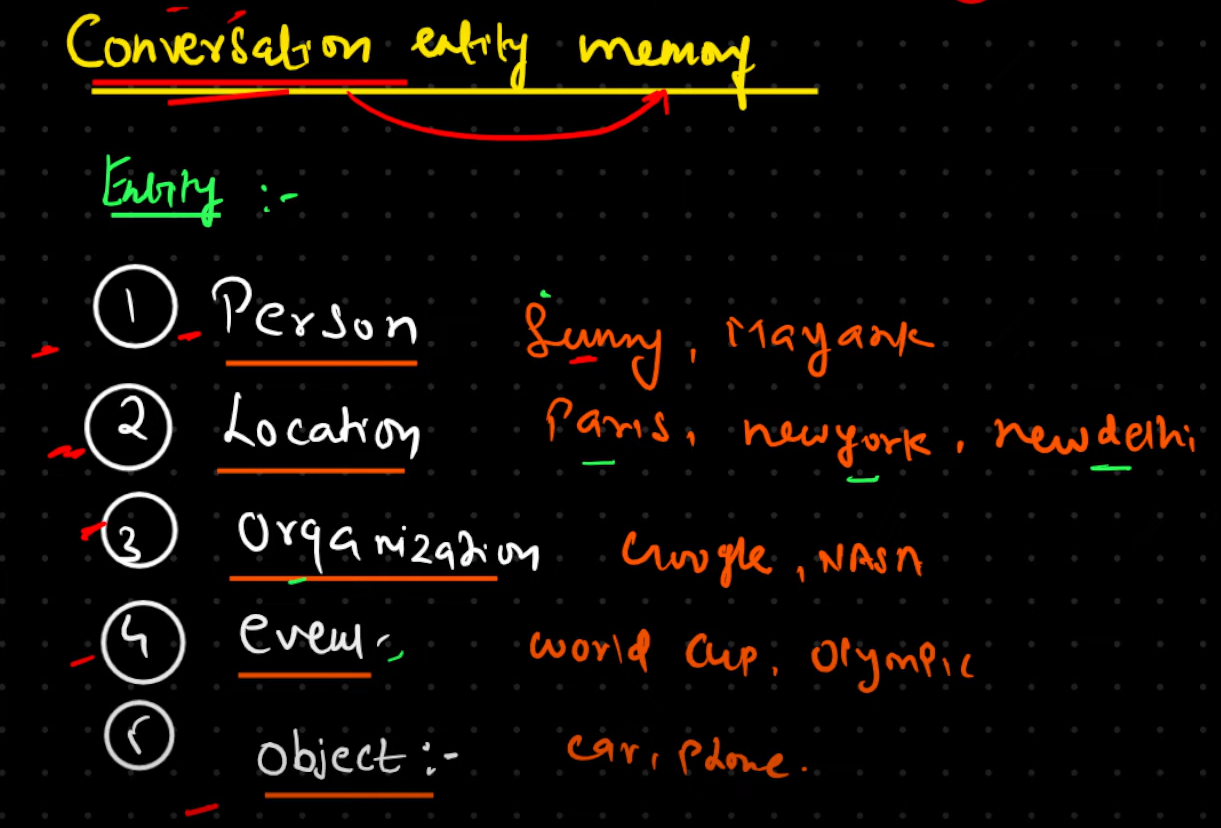

In [146]:
from langchain.memory import ConversationEntityMemory

In [147]:
## first way to store and getting conversation
memory = ConversationEntityMemory(llm=model)

In [148]:
_input = {"input": "Deven & Sam are working on a hackathon project"}

In [149]:
memory.load_memory_variables(_input)

{'history': '', 'entities': {'Deven': '', 'Sam': ''}}

In [150]:
memory.save_context(
    _input,
    {"output": " That sounds like a great project! What kind of project are they working on?"}
)

In [151]:
memory.load_memory_variables({"input": 'who is Sam'})

{'history': 'Human: Deven & Sam are working on a hackathon project\nAI:  That sounds like a great project! What kind of project are they working on?',
 'entities': {'Sam': 'Sam is working on a hackathon project with Deven.'}}

In [152]:
memory = ConversationEntityMemory(llm=model, return_messages=True)

In [153]:
memory

ConversationEntityMemory(return_messages=True, llm=ChatGoogleGenerativeAI(model='models/gemini-1.0-pro', client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7bf6bc68d1e0>, async_client=<google.ai.generativelanguage_v1beta.services.generative_service.async_client.GenerativeServiceAsyncClient object at 0x7bf6bc4aed40>, default_metadata=(), convert_system_message_to_human=True))

In [154]:
_input = {"input": "Deven & Sam are working on a hackathon project"}

In [155]:
memory.load_memory_variables(_input)

{'history': [], 'entities': {'Deven': '', 'Sam': ''}}

In [156]:
memory.save_context(
    _input,
    {"output": " That sounds like a great project! What kind of project are they working on?"}
)

In [157]:
memory.load_memory_variables({"input": 'who is Sam'})

{'history': [HumanMessage(content='Deven & Sam are working on a hackathon project'),
  AIMessage(content=' That sounds like a great project! What kind of project are they working on?')],
 'entities': {'Sam': 'Sam is working on a hackathon project with Deven.'}}

In [158]:
from langchain.chains import ConversationChain

In [159]:
from langchain.memory import ConversationEntityMemory

In [160]:
from langchain.memory.prompt import ENTITY_MEMORY_CONVERSATION_TEMPLATE

In [86]:
from pydantic import BaseModel

In [87]:
from typing import List, Dict, Any

In [88]:
## first way to store and getting conversation
conversation = ConversationChain(
    llm=model,
    verbose=True,
    prompt=ENTITY_MEMORY_CONVERSATION_TEMPLATE, #  template used to structure the input prompts that will be given to the language model.
    memory=ConversationEntityMemory(llm=model) # model will generate or understand entity data
)

In [89]:
conversation.predict(input="Deven & Sam are working on a hackathon project")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

"That's great! What kind of project are they working on?"

In [90]:
conversation.memory.entity_store.store

{'Deven': 'Deven is working on a hackathon project with Sam.',
 'Sam': 'Sam is working on a hackathon project with Deven.'}

In [91]:
conversation.predict(input="They are trying to add more complex memory structures to Langchain")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

"That's an interesting project! Langchain is a very powerful language model, and adding more complex memory structures could significantly enhance its capabilities. What specific types of memory structures are they considering adding?"

In [92]:
conversation.predict(input="They are adding in a key-value store for entities mentioned so far in the conversation.")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

"That's a great idea! A key-value store would allow Langchain to keep track of important entities and their attributes, which could be very useful for tasks such as question answering and dialogue generation. How are they planning to integrate the key-value store with the existing Langchain architecture?"

In [93]:
conversation.predict(input="What do you know about Deven & Sam?")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

'I know that Deven and Sam are working on a hackathon project together. They are trying to add more complex memory structures to Langchain, a powerful language model. Specifically, they are adding in a key-value store for entities mentioned so far in the conversation. I think this is a great idea, as it would allow Langchain to keep track of important entities and their attributes, which could be very useful for tasks such as question answering and dialogue generation.'

In [94]:
from pprint import pprint
pprint(conversation.memory.entity_store.store)

{'Deven': 'Deven is working on a hackathon project with Sam, where they are '
          'trying to add more complex memory structures to Langchain, '
          'specifically a key-value store for entities mentioned so far in the '
          'conversation.',
 'Langchain': 'Langchain is a powerful language model that Deven and Sam are '
              'working on enhancing by adding more complex memory structures.',
 'Sam': 'Sam is working on a hackathon project with Deven, specifically adding '
        'a key-value store to Langchain.'}


In [95]:
conversation.predict(input="Sam is the founder of a company called Daimon.")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

"That's interesting! I'm not familiar with Daimon, but I'm always interested in hearing about new companies. What does Daimon do?"

In [96]:
from pprint import pprint
pprint(conversation.memory.entity_store.store)

{'Daimon': 'Daimon is a company founded by Sam.',
 'Deven': 'Deven is working on a hackathon project with Sam, where they are '
          'trying to add more complex memory structures to Langchain, '
          'specifically a key-value store for entities mentioned so far in the '
          'conversation.',
 'Langchain': 'Langchain is a powerful language model that Deven and Sam are '
              'working on enhancing by adding more complex memory structures.',
 'Sam': 'Sam is working on a hackathon project with Deven, specifically adding '
        'a key-value store to Langchain. Sam is also the founder of a company '
        'called Daimon.'}


In [97]:
conversation.predict(input="What do you know about Sam?")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

'I know that Sam is working on a hackathon project with Deven, specifically adding a key-value store to Langchain. I also know that Sam is the founder of a company called Daimon.'